In [154]:
# import all basic modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from settings import ipynb_settings
ipynb_settings()

In [155]:
data = pd.read_csv(r"C:\Users\Varshil\Downloads\Regression-Yes-Bank-Stock-Closing-Price-Prediction-main\Regression-Yes-Bank-Stock-Closing-Price-Prediction-main\Data_Files\YESBANK.csv")

In [156]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.0000,14.0000,11.2500,12.4600
1,Aug-05,12.5800,14.8800,12.5500,13.4200
2,Sep-05,13.4800,14.8700,12.2700,13.3000
3,Oct-05,13.2000,14.4700,12.4000,12.9900
4,Nov-05,13.3500,13.8800,12.8800,13.4100


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### **NO NULL VALUES. 5 FEATURES AND 185 ROWS**

In [158]:
df = data.copy()

In [159]:
df['Month'] = df.Date.apply(lambda x : x.split('-')[0].strip())
df['Year'] = df.Date.apply(lambda x : int('20' + x.split('-')[1].strip()))

In [160]:
df['Date'] = pd.to_datetime(df.Date, format = r"%b-%y")

##### We have highest and lowest price of stocks for each month. I can create a feature that shows range of variation for each month. That can be derived from subtraction of 'Low' feature from 'High'. That difference is the difference between highest and lowest price of YESBANK stock for corresponding month.

In [161]:
df['range_of_var'] = df.apply(lambda x : x['High'] - x['Low'], axis = 1)

##### We also have opening and closing price for stocks. Thus we can get the profit or the loss for stock prices.

In [162]:
df['profit_loss'] = df.apply(lambda x : x['Close'] - x['Open'], axis = 1)

In [163]:
df['profit'] = df.profit_loss.apply(lambda x : 1 if x > 0 else 0)

In [164]:
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['month_num'] = df.Month.apply(lambda x : month_order[x])

In [165]:
for x in df.columns[1:5]:
    print('For ' + x + ' Price')
    print(f'Highest Price : {df[x].max()}')
    print(f'Lowest Price : {df[x].min()}')
    print()

For Open Price
Highest Price : 369.95
Lowest Price : 10.0

For High Price
Highest Price : 404.0
Lowest Price : 11.24

For Low Price
Highest Price : 345.5
Lowest Price : 5.55

For Close Price
Highest Price : 367.9
Lowest Price : 9.98



#### **EDA**

In [166]:
title_dict = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 20}
label_dict = {'family': 'sans serif', 'color':  'darkred', 'weight': 'bold', 'size': 16}

#### **We have right skewed distribution for all features. That means for most of the instances in dataset the stock prices attains the value in range 0 - 100.**

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'range_of_var'}>,
        <AxesSubplot:title={'center':'profit_loss'}>,
        <AxesSubplot:title={'center':'profit'}>],
       [<AxesSubplot:title={'center':'month_num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

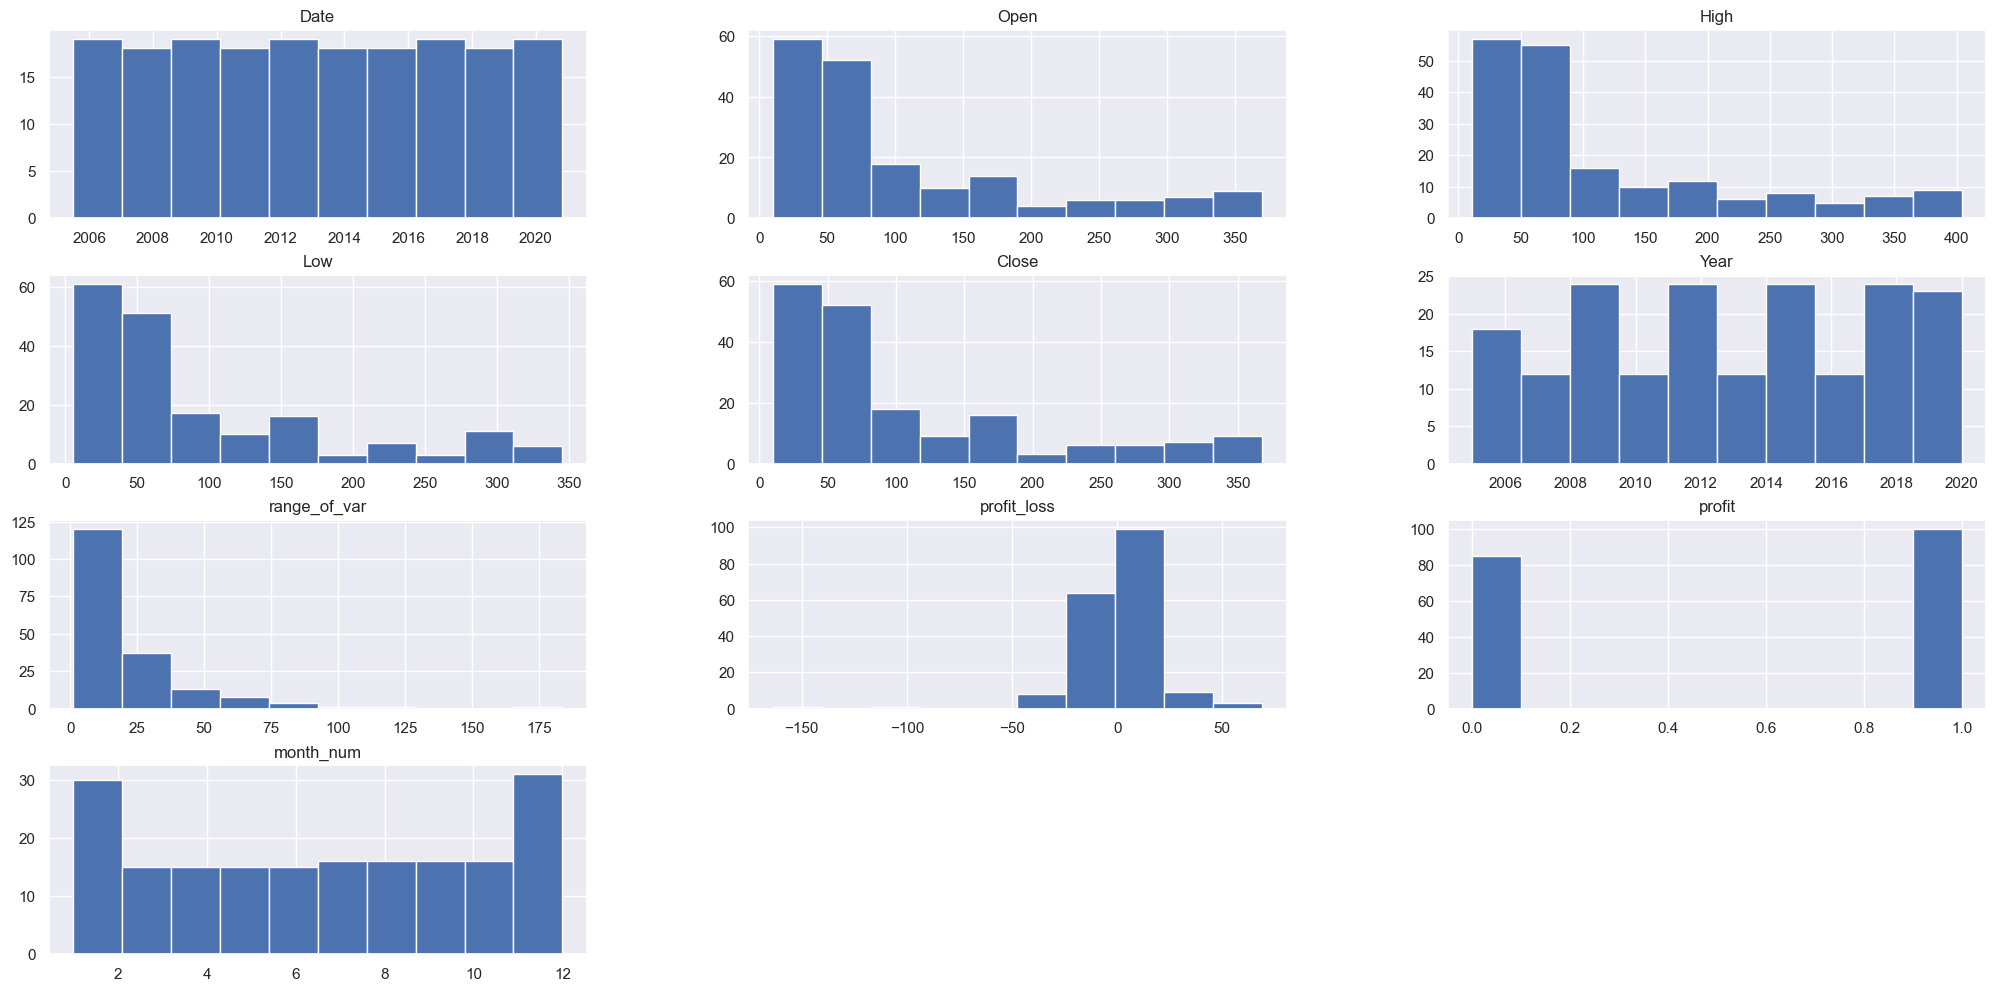

In [167]:
df.hist()

<li>All 4 Opne, close, high and low are right skewed. Meaning most of data is concentrated on low values but there are still higher values that is dispersed above some minimum threshold</li>
<li>Same is of Variation Range</li>
<li>Profit loss is normally distribued and the range goes from -50 to 60</li>
<li>Profit loss ratio is 1:0.8</li>



#### **The stock price is increased with time but in 2019 there is a sudden fall in prices that might be due to Covid-19 pandemic. In 2020 it continues to fall and reaches minimum price again.**

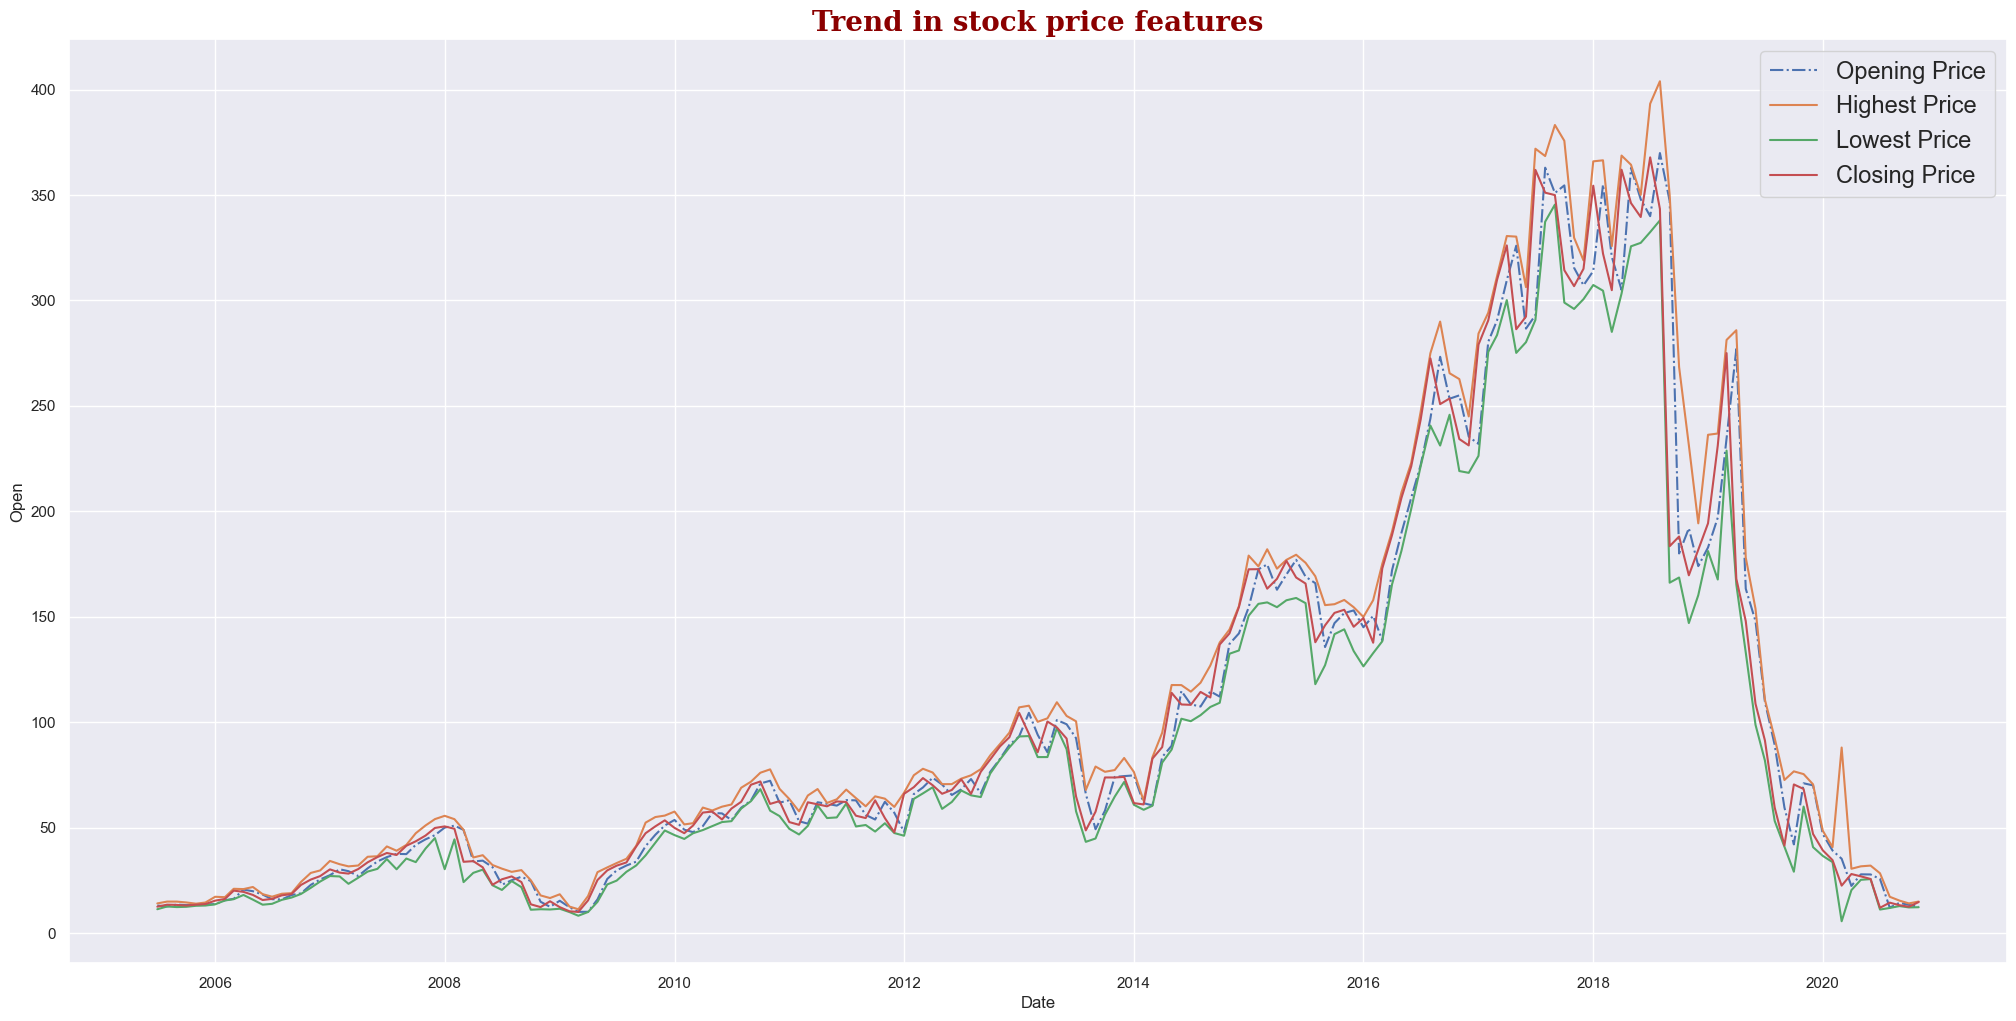

In [168]:
sns.lineplot(x = df.Date, y = df.Open, linestyle = '-.')
sns.lineplot(x = df.Date, y = df.High)
sns.lineplot(x = df.Date, y = df.Low)
sns.lineplot(x = df.Date, y = df.Close)
plt.legend(['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price'], fontsize = 17)
plt.title("Trend in stock price features", fontdict = title_dict)
plt.show()

<li>The max price of stock was 367.9 and at the end it was 14.67. The fall was 96%.</li>
<li>At the end of 2020 the prices of stocks are same as started in 2006.</li>

In [169]:
df.head()

,Date,Open,High,Low,Close,Month,Year,range_of_var,profit_loss,profit,month_num
0,2005-07-01,13.0000,14.0000,11.2500,12.4600,Jul,2005,2.7500,-0.5400,0,7
1,2005-08-01,12.5800,14.8800,12.5500,13.4200,Aug,2005,2.3300,0.8400,1,8
2,2005-09-01,13.4800,14.8700,12.2700,13.3000,Sep,2005,2.6000,-0.1800,0,9
3,2005-10-01,13.2000,14.4700,12.4000,12.9900,Oct,2005,2.0700,-0.2100,0,10
4,2005-11-01,13.3500,13.8800,12.8800,13.4100,Nov,2005,1.0000,0.0600,1,11


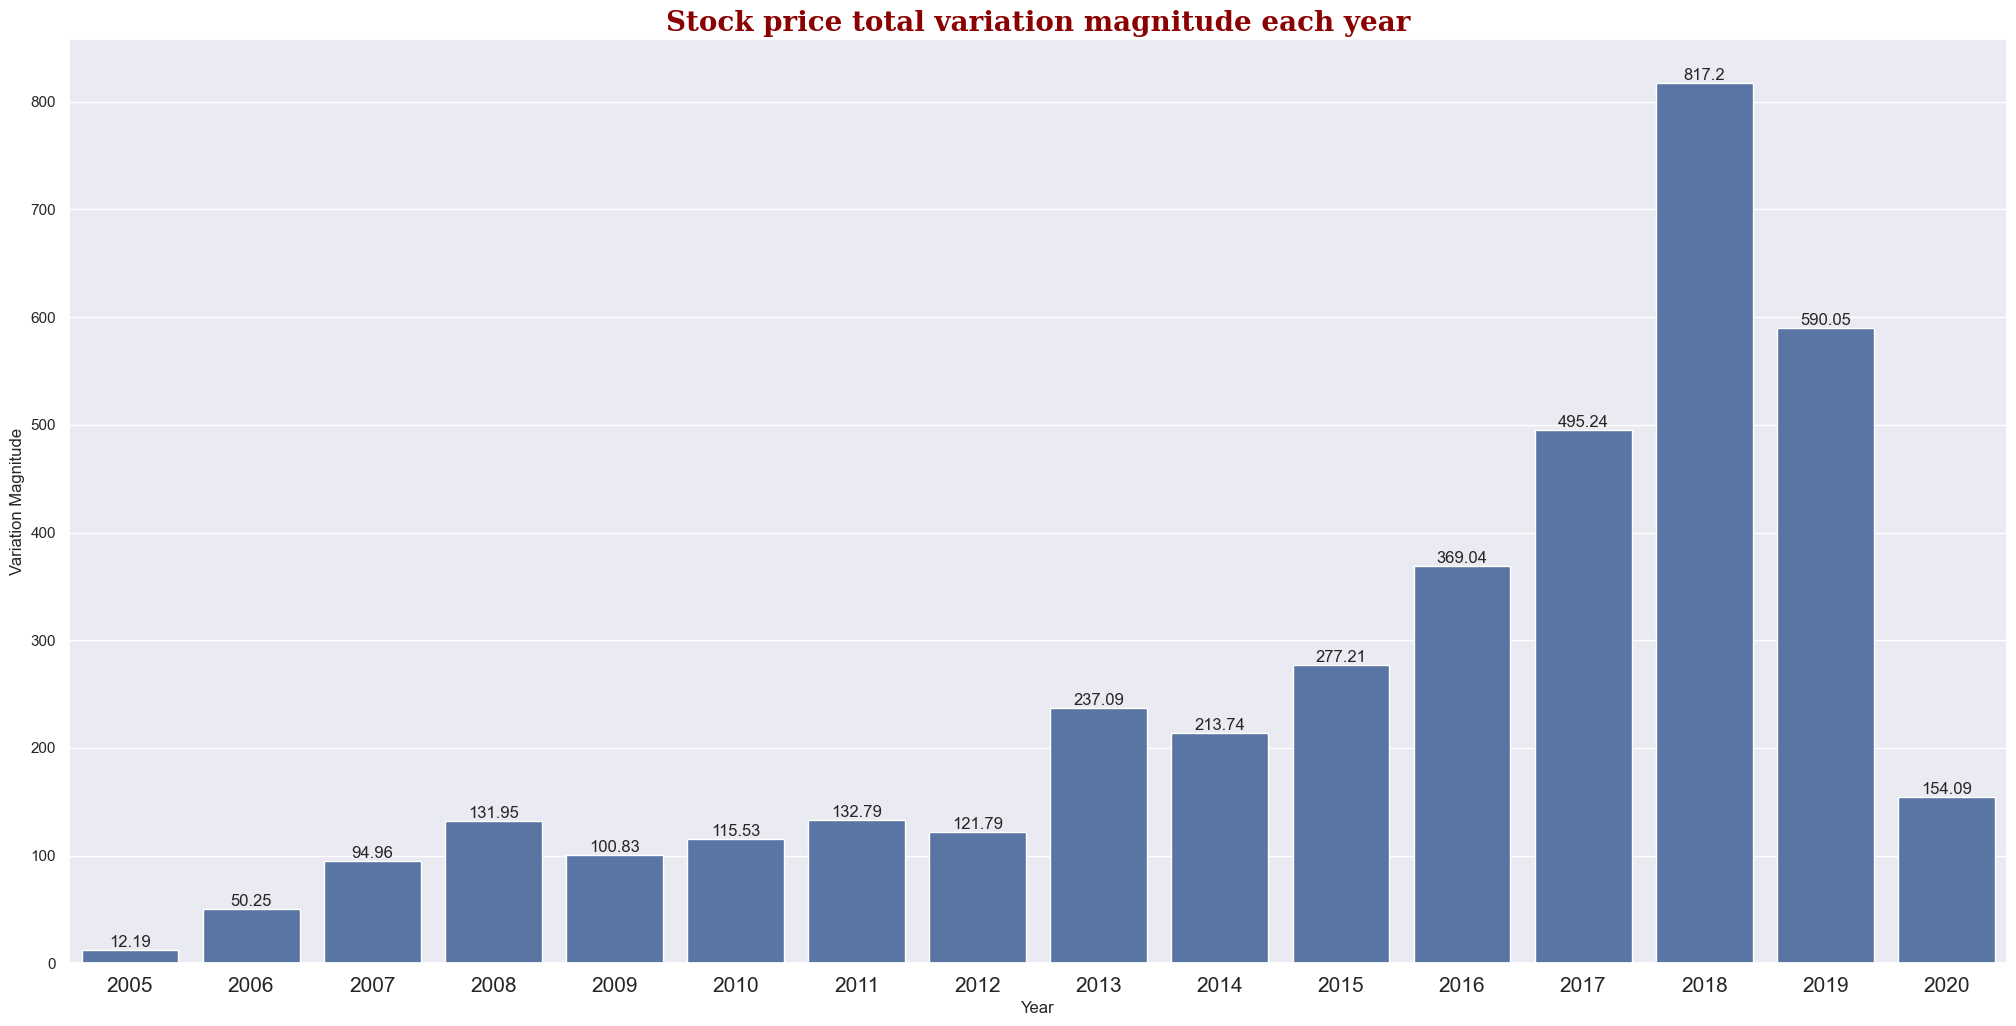

In [170]:
aux = df.groupby('Year').range_of_var.sum().reset_index(name = 'var')
bar = sns.barplot(aux, x = 'Year', y ='var')
plt.title("Stock price total variation magnitude each year", fontdict = title_dict)
plt.ylabel("Variation Magnitude")
plt.xticks(fontsize = 15)
for label in bar.containers:
    bar.bar_label(label)
plt.show()

<li>As the stock prices increase the variation in staock prices also increase.</li>

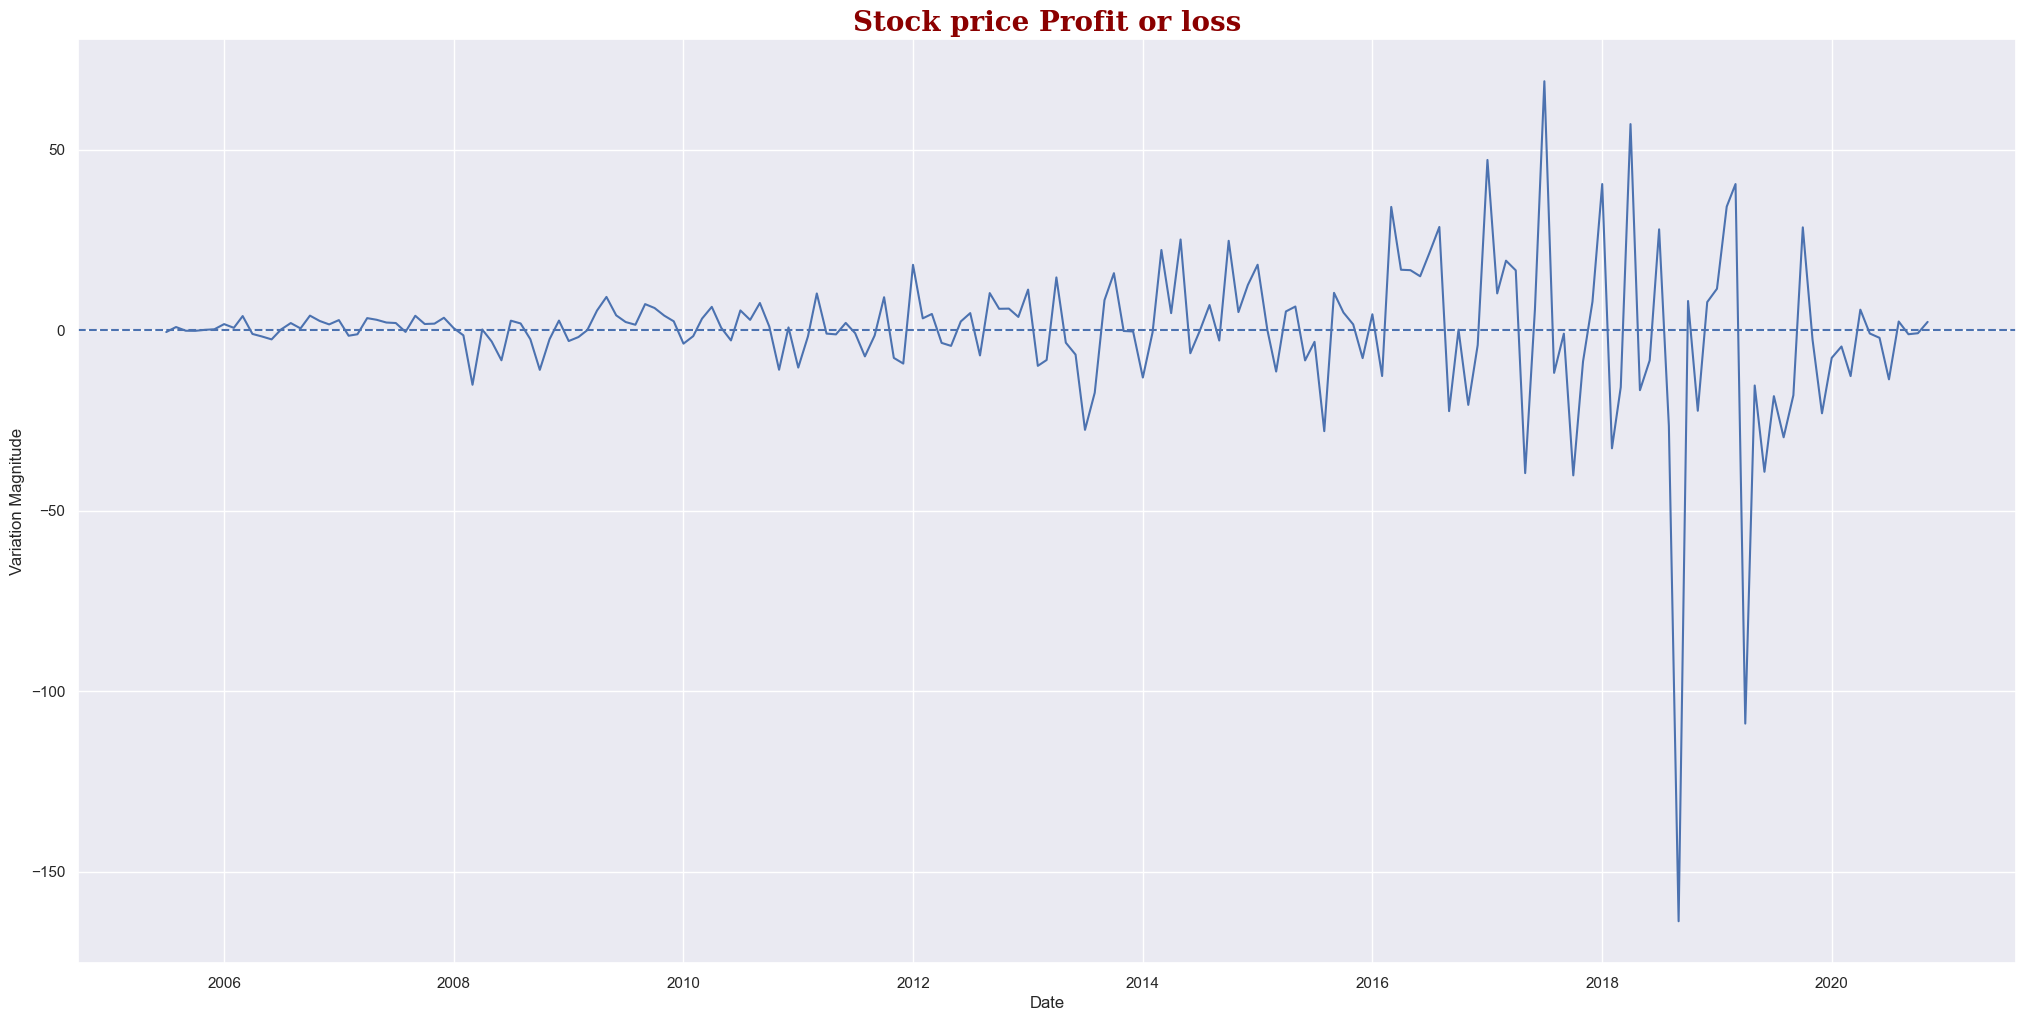

In [171]:
sns.lineplot(x = df.Date, y = df.profit_loss)
plt.axhline(y = 0, linestyle = "--")
plt.title("Stock price Profit or loss", fontdict = title_dict)
plt.ylabel("Variation Magnitude")
plt.show()

<li>As the time goes the curve becomes more spikey means more variation in stock prices</li>
<li>Loss spikes are more compared to Profit.</li?>

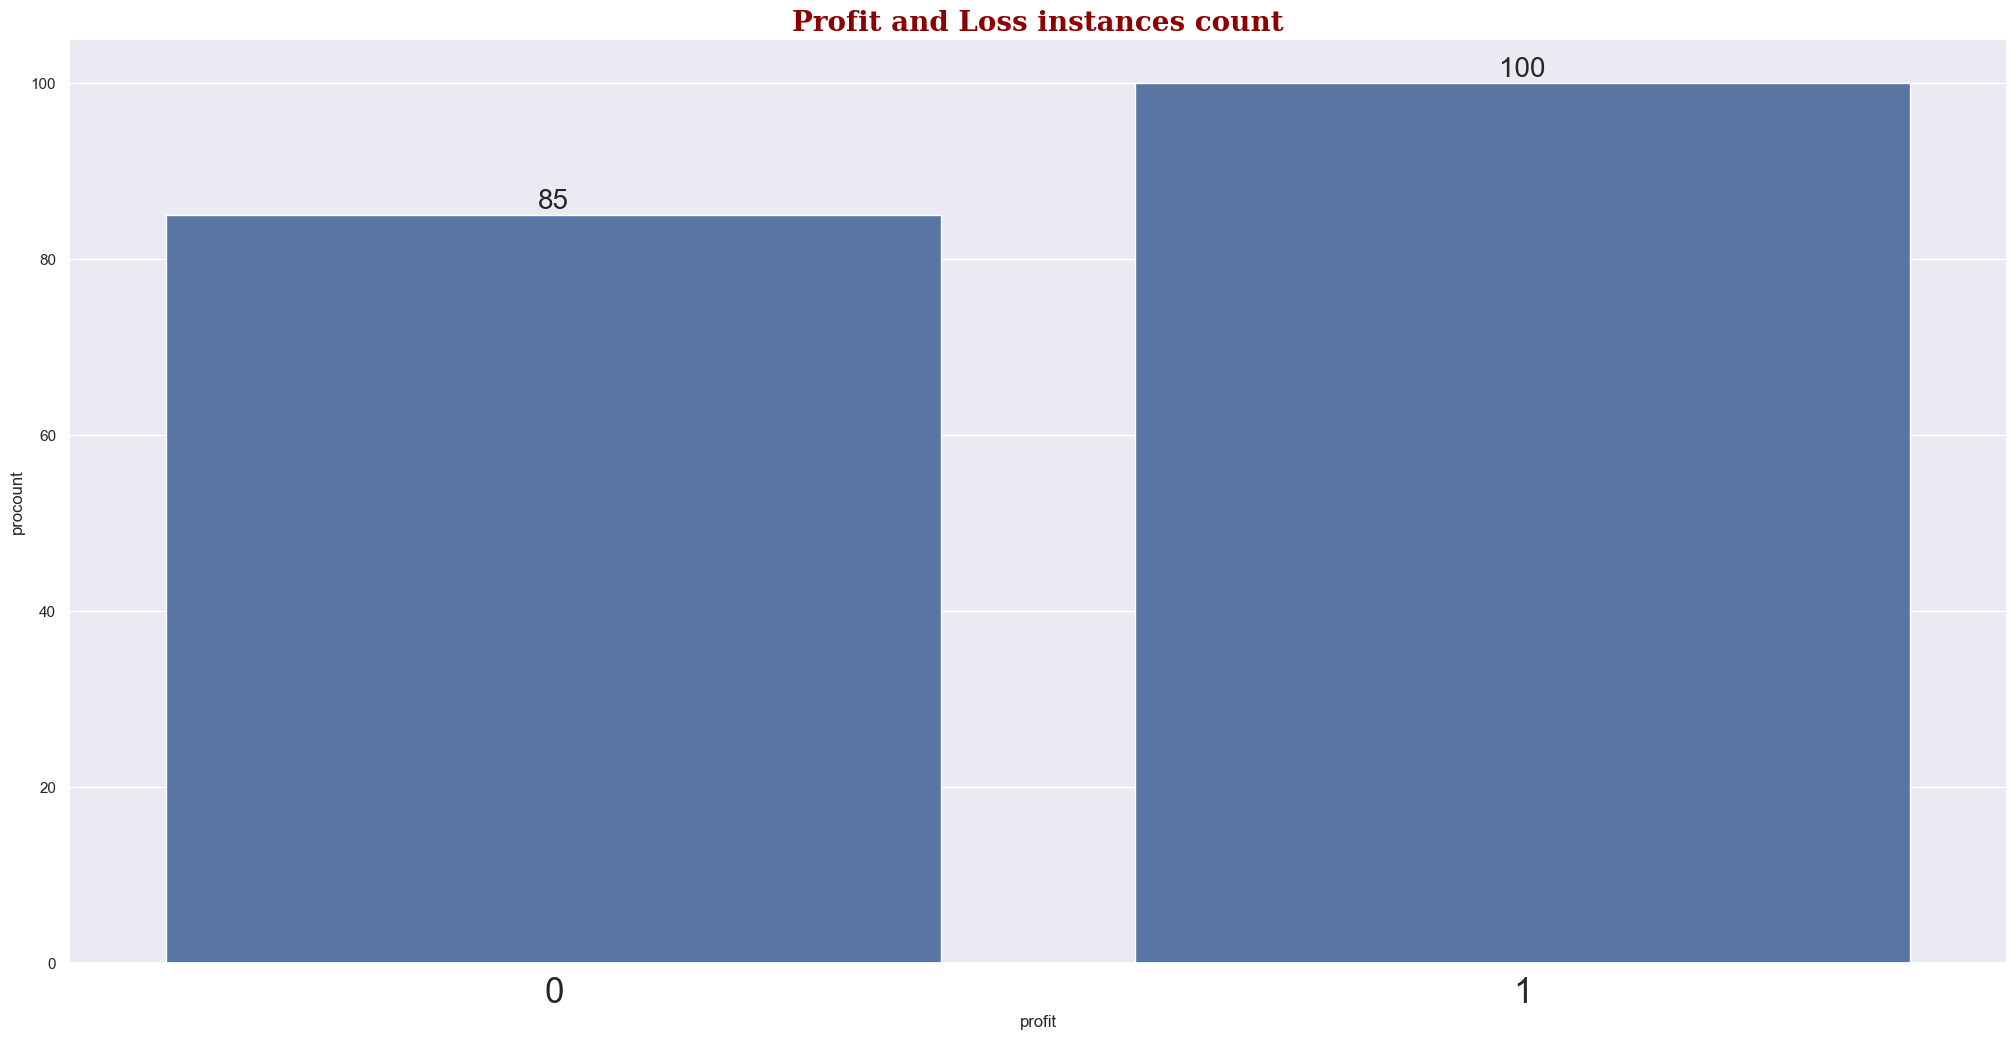

In [172]:
aux = df.groupby('profit').profit.count().reset_index(name = 'procount')
bar = sns.barplot(y = aux.procount, x = aux.profit)
plt.xticks(fontsize = 15)
plt.title("Profit and Loss instances count", fontdict= title_dict)
for label in bar.containers:
        bar.bar_label(label, fontsize = 20)
plt.xticks(fontsize=25)
plt.show()


In [173]:
df.profit_loss.sum()

-62.29000000000023

<li>Profit instances are more compareed to loss instances, but losses amount is more because of huge loss spikes</li>

<AxesSubplot:>

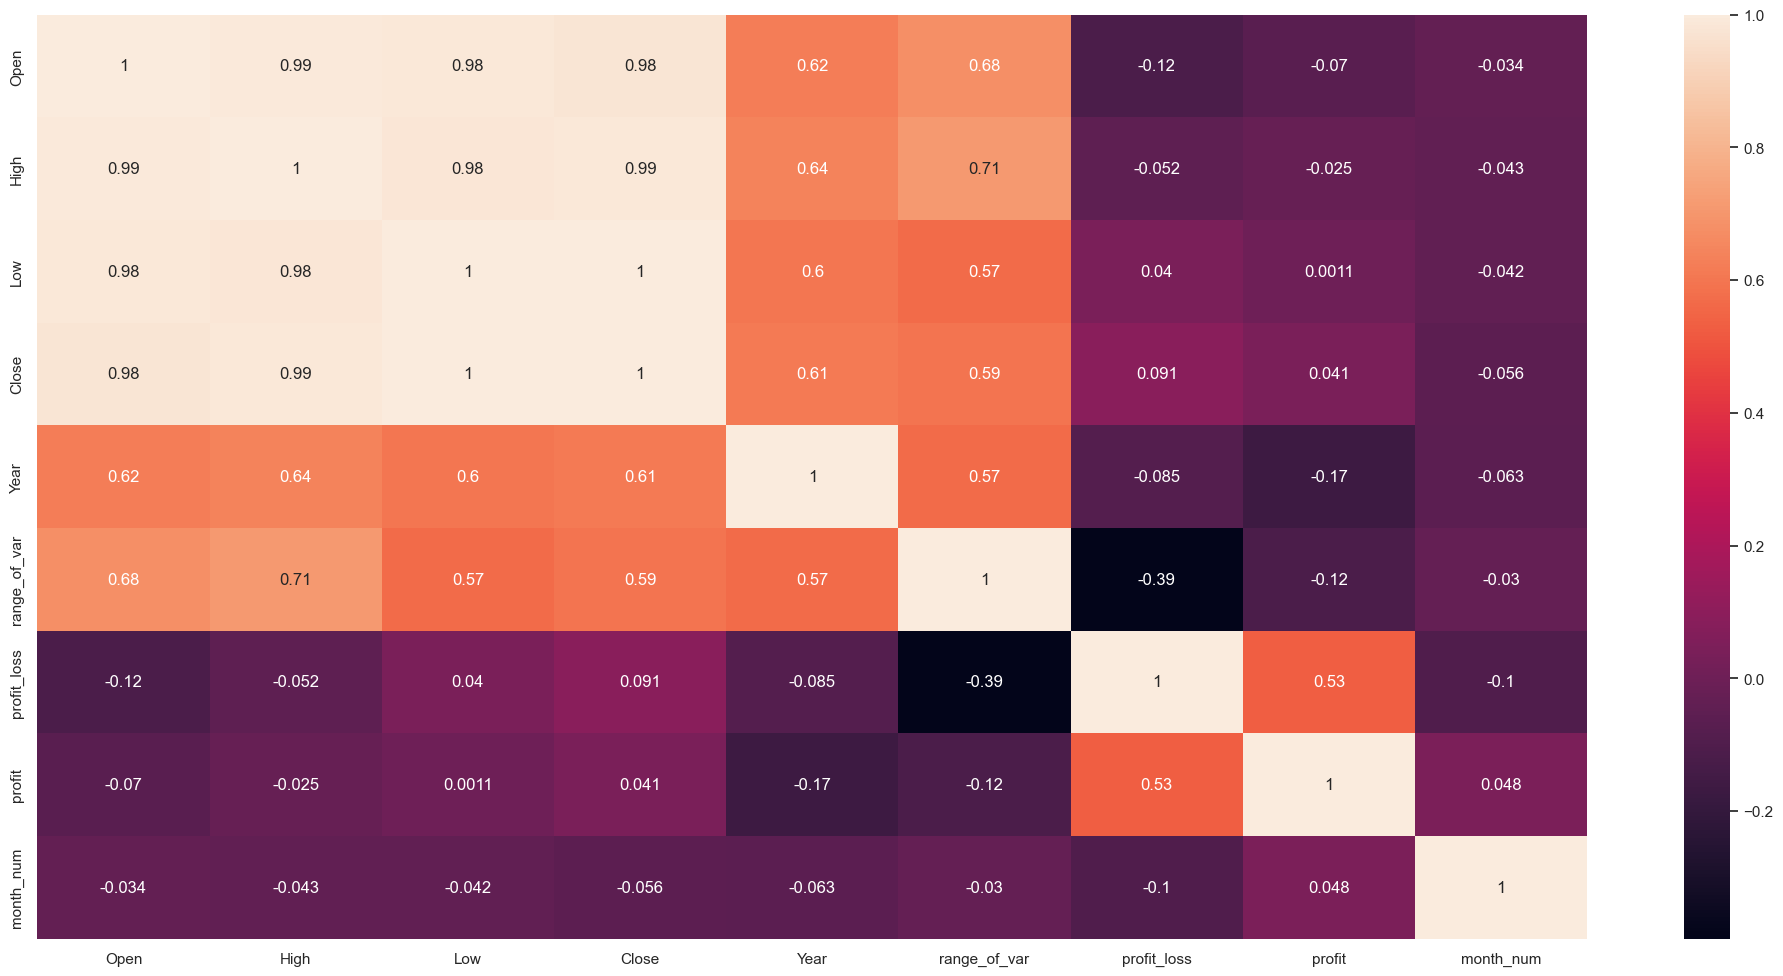

In [174]:
sns.heatmap(df.corr(), annot = True)

<li>The main 3 elements [open, high, low] are directly related to closing price</li>

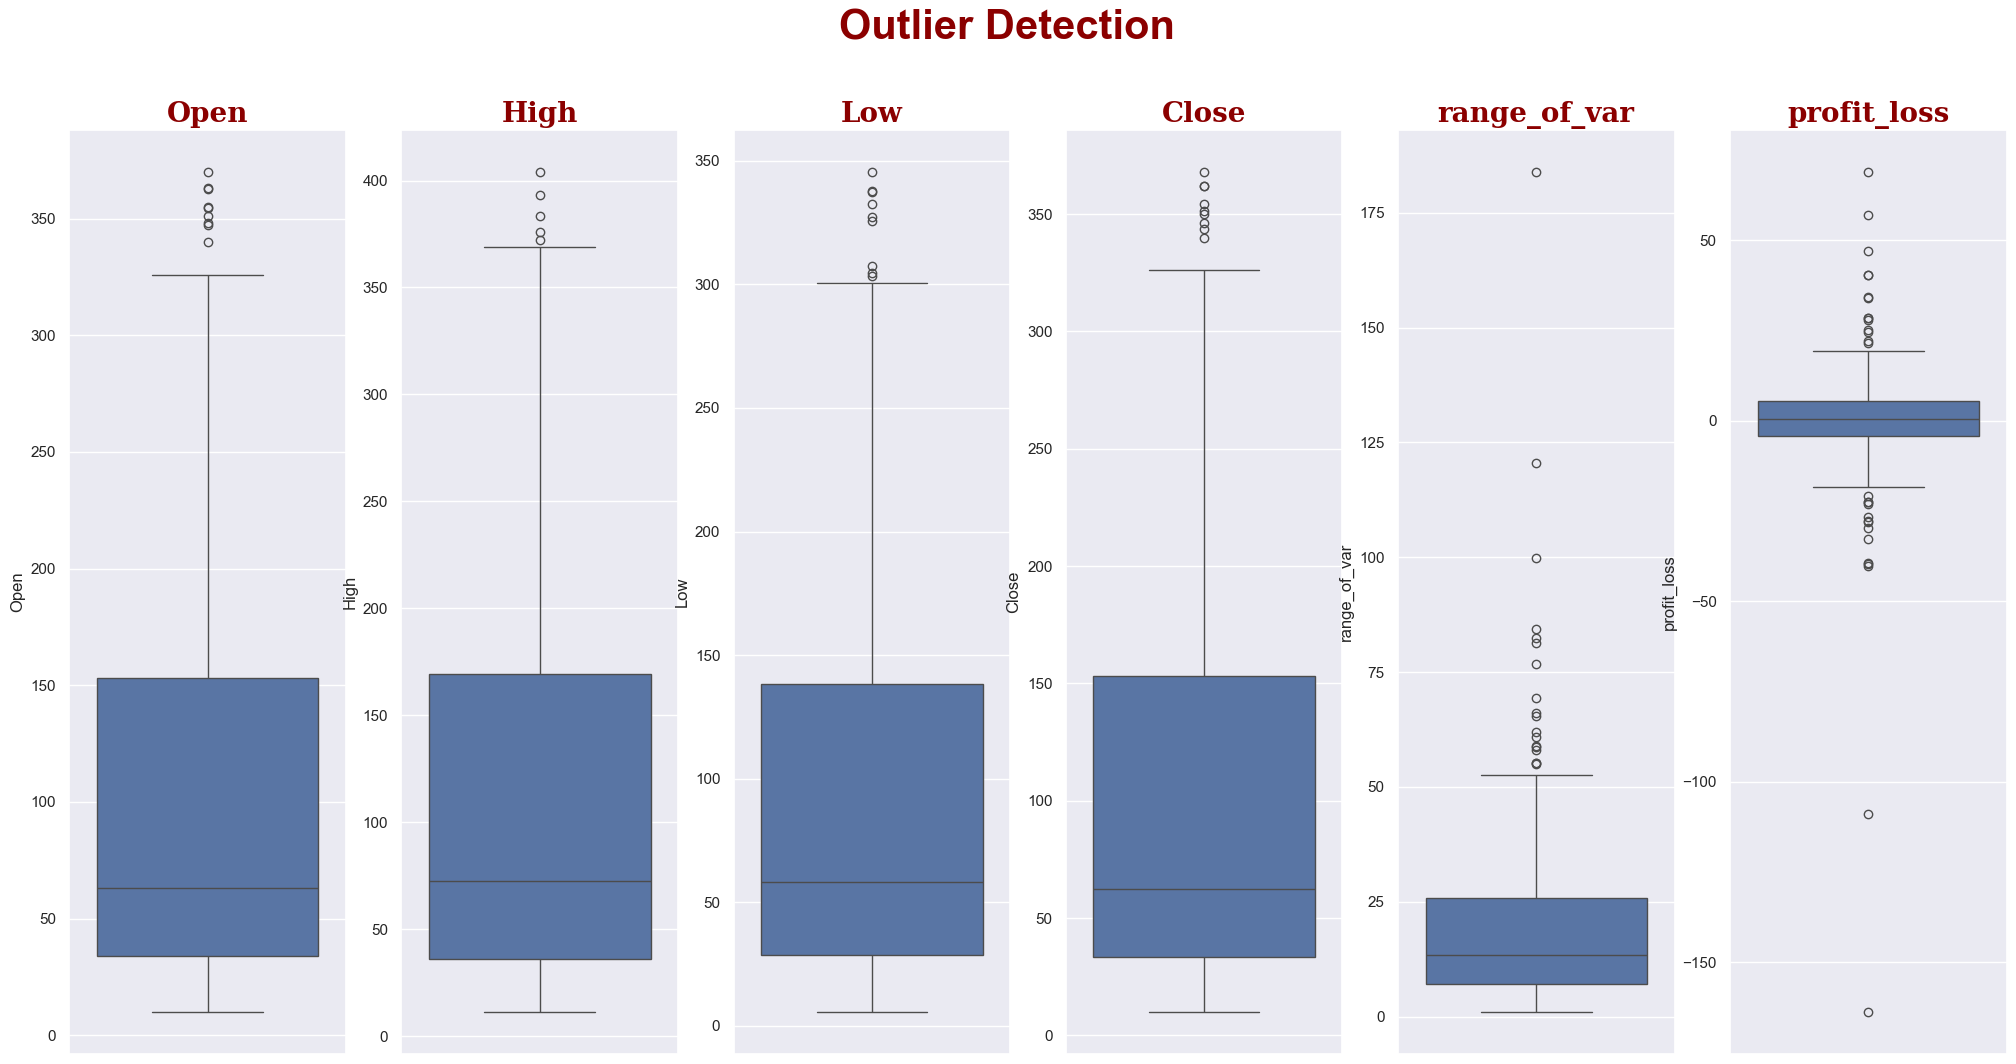

In [175]:
df_num = df.select_dtypes(['float'])
for i,x in enumerate(df_num.columns):
    plt.subplot(161+i)
    sns.boxplot(df[x])
    plt.title(x, fontdict=title_dict)
plt.suptitle("Outlier Detection",  fontsize = 30, weight = 'bold', Color = 'darkred')
plt.show()

##### Our main features [open, close, high, low] doesnt have many outliers and can be ignored. Other 2 features shows more outliers but those are important variations in data and can be ignored.

### **MACHINE LEARNING MODELS**

##### I will seperate 2019-20 data for the test and use the train data (2005-2018) to predict on 2019-20 using different Regression Models. I will be using LinearRegression, Lasso, Ridge, XGBoost, RandomForestReggression

In [176]:
df.head()

,Date,Open,High,Low,Close,Month,Year,range_of_var,profit_loss,profit,month_num
0,2005-07-01,13.0000,14.0000,11.2500,12.4600,Jul,2005,2.7500,-0.5400,0,7
1,2005-08-01,12.5800,14.8800,12.5500,13.4200,Aug,2005,2.3300,0.8400,1,8
2,2005-09-01,13.4800,14.8700,12.2700,13.3000,Sep,2005,2.6000,-0.1800,0,9
3,2005-10-01,13.2000,14.4700,12.4000,12.9900,Oct,2005,2.0700,-0.2100,0,10
4,2005-11-01,13.3500,13.8800,12.8800,13.4100,Nov,2005,1.0000,0.0600,1,11


### Since Open, high, Low are the features who have covariance of ~0.99, we dont need any other features.
### But they are also highly corelate with each other, thus I will add 2 more features profit_loss and range_of_var


### Transformation

In [183]:
df_ml = df[['Date', 'Open', 'High', 'Low', 'Close', 'range_of_var', 'profit_loss']]

In [184]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_ml[['Open', 'High', 'Low', 'Close', 'range_of_var', 'profit_loss']])
scaled_df[0]"""

array([-0.93843727, -0.96283306, -0.92003406, -0.94332939, -0.78695852,
       -0.0098355 ])

In [223]:
df_log = pd.DataFrame()
df_log['Open'] = df_ml.Open.apply(lambda x: np.log(x))
df_log['High'] = df_ml.High.apply(lambda x: np.log(x))
df_log['Low'] = df_ml.Low.apply(lambda x: np.log(x))
df_log['Close'] = df_ml.Close.apply(lambda x: np.log(x))
df_log['range_of_var'] = df_ml.range_of_var.apply(lambda x: np.log(x))
df_log['profit_loss'] = df_ml.profit_loss
df_log['Date'] = df_ml.Date
df_log.head()

,Open,High,Low,Close,range_of_var,profit_loss,Date
0,2.5649,2.6391,2.4204,2.5225,1.0116,-0.5400,2005-07-01
1,2.5321,2.7000,2.5297,2.5967,0.8459,0.8400,2005-08-01
2,2.6012,2.6993,2.5072,2.5878,0.9555,-0.1800,2005-09-01
3,2.5802,2.6721,2.5177,2.5642,0.7275,-0.2100,2005-10-01
4,2.5915,2.6304,2.5557,2.5960,0.0000,0.0600,2005-11-01


In [254]:
df_ = df_log.copy()

In [255]:
X_train = df_[df_.Date < '2017-01-01'].copy()
y_train = X_train.Close
X_train.drop(['Date', 'Close', 'range_of_var', 'profit_loss'], axis = 1, inplace = True)

X_test = df_[df_.Date >= '2017-01-01'].copy()
y_test = X_test.Close
y_test_index = X_test.Date
X_test.drop(['Date', 'Close', 'range_of_var', 'profit_loss'], axis = 1, inplace = True)

"""X_train = df_.iloc[:130].copy()
y_train = X_train.Close
X_train.drop(['Date', 'Close'], axis = 1, inplace = True)


X_test = df_.iloc[130:].copy()
y_test = X_test.Close
y_test_index = X_test.index
X_test.drop(['Date', 'Close'], axis = 1, inplace = True)"""

"X_train = df_.iloc[:130].copy()\ny_train = X_train.Close\nX_train.drop(['Date', 'Close'], axis = 1, inplace = True)\n\n\nX_test = df_.iloc[130:].copy()\ny_test = X_test.Close\ny_test_index = X_test.index\nX_test.drop(['Date', 'Close'], axis = 1, inplace = True)"

In [256]:
print(f"total features : {X_test.shape[1]}")
cols = " | ".join(X_test.columns)
print(f"Features to be taken : {cols}")
print(f"Training size : {X_train.shape[0]}")
print(f"Testing size : {X_test.shape[0]}")

total features : 3
Features to be taken : Open | High | Low
Training size : 138
Testing size : 47


### 70% data is used for training; 30% for testing

In [227]:
def mean_absolute_percentage_error(y, yhat):
    return np.mean(np.abs((y - yhat) / y)*100)

def ml_error(model_name, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
    r2 = r2_score(y, yhat)
    return pd.DataFrame({"MAE": mae,
                         "MAPE": mape,
                         "RMSE": rmse, 
                        "R2" :r2}, index=[model_name])

In [190]:
# ML
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter('ignore')

In [257]:
##  model
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred_lr = lr.predict(X_test)

# perfomance
lr_result = ml_error("Linear Regression", y_test, y_pred_lr)
lr_result

,MAE,MAPE,RMSE,R2
Linear Regression,0.0692,1.6956,0.1041,0.9918


In [258]:
# Ridge model
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(Lasso(), param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)
print("Best Parameters : ", lasso_regressor.best_params_)

Best Parameters :  {'alpha': 0.0001}


In [259]:
# model
lrr = Lasso(alpha=0.0001)
lrr.fit(X_train, y_train)

# prediction
y_pred_lrr = lrr.predict(X_test)

# perfomance
lrr_result = ml_error("LR Lasso", y_test, y_pred_lrr)
lrr_result

,MAE,MAPE,RMSE,R2
LR Lasso,0.0701,1.7164,0.1051,0.9916


In [231]:
# Ridge model
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(Ridge(), param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)
print("Best Parameters : ", ridge_regressor.best_params_)

Best Parameters :  {'alpha': 0.01}


In [232]:

lr_ridge = Ridge(alpha = 0.01)
lr_ridge.fit(X_train, y_train)

# prediction
y_pred_lr_ridge = lr_ridge.predict(X_test)

# perfomance
lrr_result_ridge = ml_error("LR Ridge", y_test, y_pred_lr_ridge)
lrr_result_ridge

,MAE,MAPE,RMSE,R2
LR Ridge,0.0697,1.7076,0.1045,0.9917


In [233]:
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(X_train,y_train)
elastic_regressor.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1}

In [234]:
elastic =ElasticNet(alpha = 0.0001, l1_ratio = 0.1)
elastic.fit(X_train, y_train)

# prediction
y_pred_elastic = elastic.predict(X_test)

# perfomance
elastic_result = ml_error("Elastic Net", y_test, y_pred_elastic)
elastic_result

,MAE,MAPE,RMSE,R2
Elastic Net,0.0699,1.7129,0.1046,0.9917


In [235]:
# search for best hyper param
rf = RandomForestRegressor()
params = {'n_estimators':[x for x in range(30, 150, 30)],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)
rf_model.fit(X_train,y_train)
rf_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 120}

In [237]:
# model
rf = RandomForestRegressor(
                            n_estimators=120,
                            criterion = 'friedman_mse', 
                            max_features = None,
                            random_state=42
                          )
rf.fit(X_train, y_train)

# prediction
y_pred_rf = rf.predict(X_test)

# performance
rf_result = ml_error("Random Forest Regressor", y_test, y_pred_rf)
rf_result

,MAE,MAPE,RMSE,R2
Random Forest Regressor,0.1837,4.0924,0.2261,0.9613


In [238]:
xgbr = XGBRegressor()
params = {'n_estimators':[x for x in range(30, 150, 30)],'eta':[0.01, 0.05, 0.1, 0.5, 0.9],'max_depth':[10, 7, 12, 15], 
                            'subsample' : [0.7, 0.8, 0.9]}
rf_model = GridSearchCV(xgbr, params, cv=5)
rf_model.fit(X_train,y_train)
rf_model.best_params_

{'eta': 0.1, 'max_depth': 15, 'n_estimators': 120, 'subsample': 0.7}

In [239]:
# model
xgbr = XGBRegressor(
                    n_estimators = 120,
                    eta = 0.1,
                    max_depth = 15,
                    subsample = 0.7,
                    )

xgbr.fit(X_train, y_train)

# prediction
y_pred_xgb = xgbr.predict(X_test)

# performance
xgb_result = ml_error("XGBoost Regressor", y_test, y_pred_xgb)
xgb_result

,MAE,MAPE,RMSE,R2
XGBoost Regressor,0.1814,3.8350,0.2152,0.9649


In [240]:
models = pd.concat([lr_result, lrr_result, lrr_result_ridge, rf_result, xgb_result, elastic_result])
models.sort_values(by = 'R2')

,MAE,MAPE,RMSE,R2
Random Forest Regressor,0.1837,4.0924,0.2261,0.9613
XGBoost Regressor,0.1814,3.8350,0.2152,0.9649
LR Lasso,0.0701,1.7164,0.1051,0.9916
Elastic Net,0.0699,1.7129,0.1046,0.9917
LR Ridge,0.0697,1.7076,0.1045,0.9917
Linear Regression,0.0692,1.6956,0.1041,0.9918


### Lets plot predictions

In [241]:
predictions = [pd.DataFrame(y_test.reset_index()), 
                pd.Series(y_pred_lr), 
                pd.Series(y_pred_lrr),
                pd.Series(y_pred_lr_ridge),  
                pd.Series(y_pred_elastic), 
                pd.Series(y_pred_rf), 
                pd.Series(y_pred_xgb), 
                pd.DataFrame(y_test_index.reset_index())]

pred_df = pd.concat(predictions, axis = 1)

In [242]:
pred_df.columns = ['index', 'test', 'LR', 'LR_LASSO', 'LR_RIDGE', 'ELASTIC_NET', 'RFR', 'XGB', 'index2', 'date']
pred_df

,index,test,LR,LR_LASSO,LR_RIDGE,ELASTIC_NET,RFR,XGB,index2,date
0,138,5.6316,5.6064,5.6041,5.6049,5.6043,5.5337,5.5260,138,2017-01-01
1,139,5.6718,5.6765,5.6761,5.6764,5.6763,5.5582,5.5461,139,2017-02-01
2,140,5.7360,5.7255,5.7249,5.7252,5.7251,5.5582,5.5461,140,2017-03-01
3,141,5.7873,5.7820,5.7814,5.7817,5.7816,5.5582,5.5461,141,2017-04-01
4,142,5.6573,5.7014,5.7026,5.7019,5.7022,5.5582,5.5461,142,2017-05-01
5,143,5.6780,5.7101,5.7096,5.7098,5.7097,5.5582,5.5461,143,2017-06-01
6,144,5.8915,5.8820,5.8790,5.8801,5.8792,5.5582,5.5461,144,2017-07-01
7,145,5.8612,5.8741,5.8746,5.8744,5.8745,5.5582,5.5461,145,2017-08-01
8,146,5.8579,5.9366,5.9356,5.9360,5.9358,5.5582,5.5461,146,2017-09-01
9,147,5.7505,5.8221,5.8227,5.8222,5.8223,5.5582,5.5461,147,2017-10-01


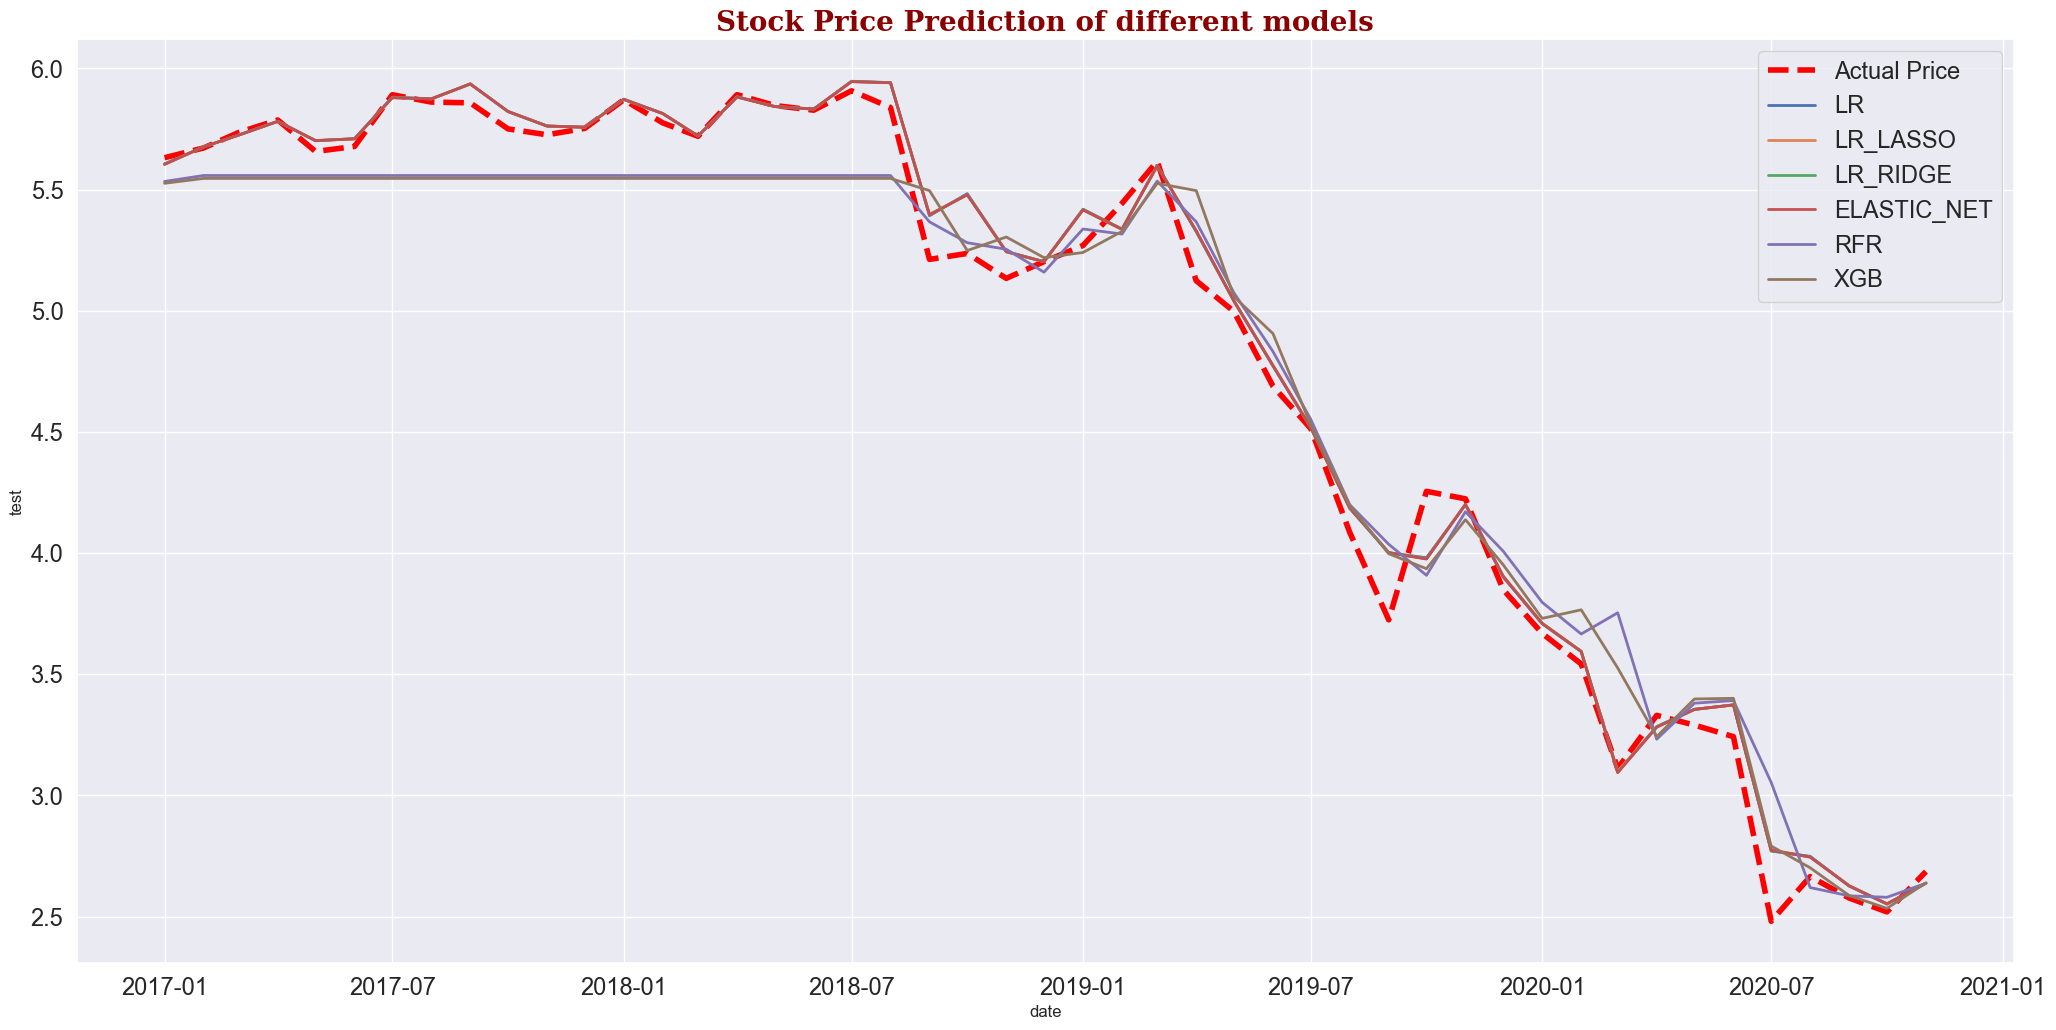

In [243]:
sns.lineplot(x = pred_df.date, y = pred_df['test'], color = 'red', linewidth = 4, linestyle='--')
for x in ['LR', 'LR_LASSO', 'LR_RIDGE', 'ELASTIC_NET', 'RFR', 'XGB']:
    sns.lineplot(x = pred_df.date, y = pred_df[x], linewidth = 2)
plt.legend(['Actual Price', 'LR', 'LR_LASSO', 'LR_RIDGE', 'ELASTIC_NET', 'RFR', 'XGB'], fontsize = 17, fancybox = True)                                                                                                    
plt.title('Stock Price Prediction of different models', fontdict=title_dict)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

#### from above graph we can see that for linear Regression, Lasso and Ridge predictions are very close to test data and are overlapped on each other. RandomForest and XGB can be seen varying around test data.


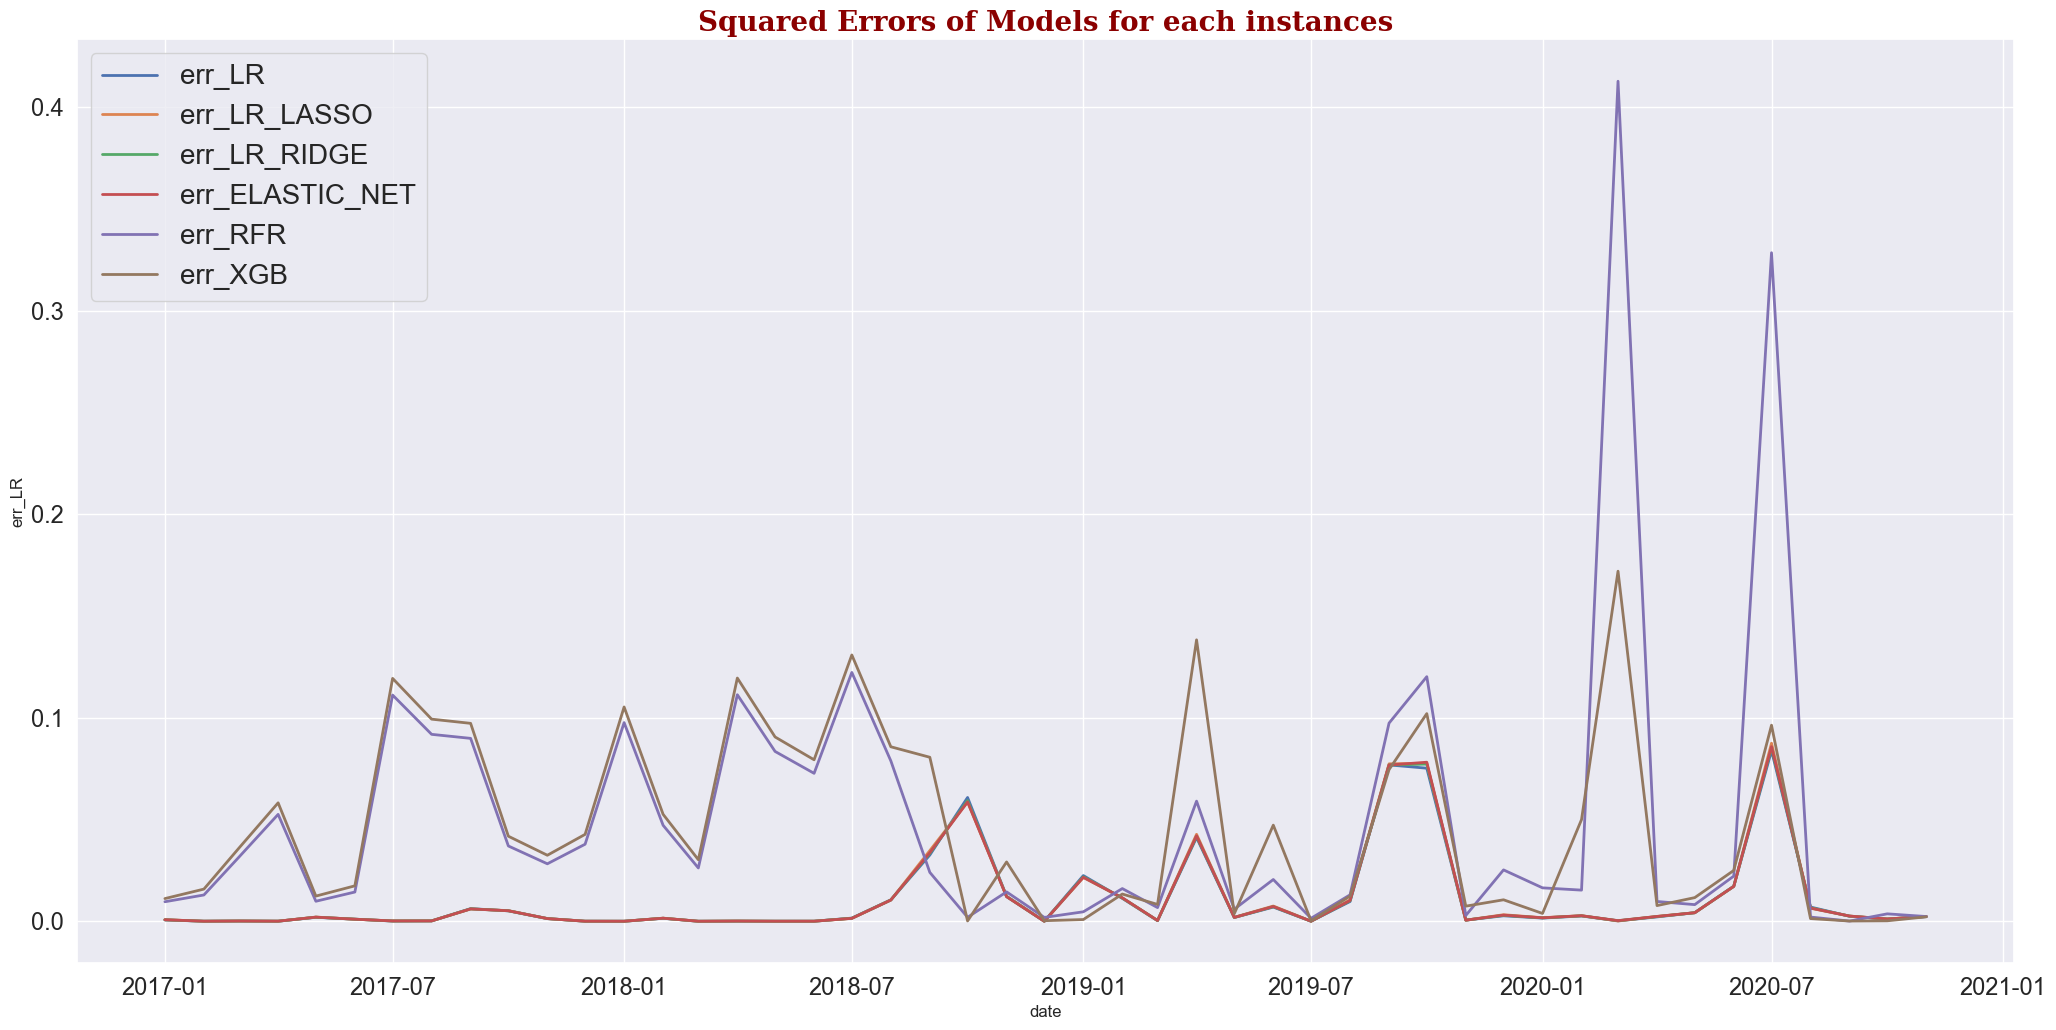

In [244]:
# lets plot squared errors for each instance 

for col in ['LR', 'LR_LASSO', 'LR_RIDGE', 'ELASTIC_NET', 'RFR', 'XGB']:
    pred_df[f'err_{col}'] = pred_df.apply(lambda x: (x['test'] - x[f'{col}'])**2, axis = 1)
del x
for x in ['err_LR', 'err_LR_LASSO', 'err_LR_RIDGE', 'err_ELASTIC_NET','err_RFR', 'err_XGB']:
    sns.lineplot(x = pred_df.date, y = pred_df[x], linewidth = 2)
plt.legend(['err_LR', 'err_LR_LASSO', 'err_LR_RIDGE', 'err_ELASTIC_NET', 'err_RFR', 'err_XGB'], fontsize = 20)
plt.title('Squared Errors of Models for each instances', fontdict=title_dict)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

In [245]:
models.sort_values(by = 'R2', ascending = False)

,MAE,MAPE,RMSE,R2
Linear Regression,0.0692,1.6956,0.1041,0.9918
LR Ridge,0.0697,1.7076,0.1045,0.9917
Elastic Net,0.0699,1.7129,0.1046,0.9917
LR Lasso,0.0701,1.7164,0.1051,0.9916
XGBoost Regressor,0.1814,3.8350,0.2152,0.9649
Random Forest Regressor,0.1837,4.0924,0.2261,0.9613


<li>Zero error of Linear Regression, Lasso and Ridge</li>
<li>R2 score is 0.99 for Linear, Lasso and Ridge</li>

### **Conclusion**
#### YES BANK Stock Prices date consisting of 3 features can be easily used to predict the Closing Stock price using Linear Regression with 0 error and r2 score of 0.99.
